In [1]:
!pip install "tensorflow-gpu>=1.15.2,<2.0"
!pip install ampligraph
# !pip install "tensorflow>=1.15.2,<2.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 411.0 MB 14 kB/s 
     |████████████████████████████████| 50 kB 4.9 MB/s 
     |████████████████████████████████| 20.1 MB 4.9 MB/s 
     |████████████████████████████████| 3.8 MB 44.8 MB/s 
     |████████████████████████████████| 2.9 MB 27.4 MB/s 
     |████████████████████████████████| 503 kB 68.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=58816d87edc34bed5f5425e6f173d026d55d3da3093bb668675eee370f68fb9f
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninsta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 168 kB 5.0 MB/s 
     |████████████████████████████████| 500 kB 45.9 MB/s 
     |████████████████████████████████| 61 kB 397 kB/s 
     |████████████████████████████████| 2.7 MB 43.7 MB/s 
     |████████████████████████████████| 6.4 MB 35.5 MB/s 
     |████████████████████████████████| 120 kB 57.5 MB/s 
     |████████████████████████████████| 561 kB 50.6 MB/s 
     |████████████████████████████████| 66 kB 4.3 MB/s 
     |████████████████████████████████| 41 kB 405 kB/s 
     |████████████████████████████████| 41 kB 570 kB/s 
     |████████████████████████████████| 100 kB 10.8 MB/s 
     |████████████████████████████████| 84 kB 839 kB/s 
     |████████████████████████████████| 121 kB 63.2 MB/s 
     |████████████████████████████████| 90 kB 9.0 MB/s 
  Created wheel for commonmark: filename=CommonMark-0.5.4-py3-none-any.whl size=30768 sha256=e3f561266

In [2]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/USC_Classes/558/Project/Data_KG_Creation/')#


Mounted at /content/drive


In [3]:
# %tensorflow_version 1.x 
import numpy as np
import pandas as pd
import ampligraph

ampligraph.__version__

'1.4.0'

In [4]:
from ampligraph.datasets import load_from_csv
from ampligraph.utils.model_utils import dataframe_to_triples
import requests

In [5]:
targets = pd.read_csv("rel_TARGETS.csv").rename(columns={'exercise':'subject', 'muscle':'object'})
display(targets.head())
schema = [['subject', 'TARGETS', 'object']]
targets_X = dataframe_to_triples(targets, schema)
print(targets_X[0])
print(targets.isnull().sum())

part_of = pd.read_csv("rel_PART_OF.csv").rename(columns={'muscle':'subject', 'anatomy':'object'})
display(part_of.head())
schema = [['subject', 'PART_OF', 'object']]
part_of_X = dataframe_to_triples(part_of, schema)
print(part_of_X[0])
print(part_of.isnull().sum())

uses = pd.read_csv("rel_USES.csv").rename(columns={'name':'subject', 'equipment':'object'})
display(uses.head())
schema = [['subject', 'USES', 'object']]
uses_X = dataframe_to_triples(uses, schema)
print(uses_X[0])
print(uses.isnull().sum())

####
##YOGA
###
fOLLOWS_yoga = pd.read_csv("rel_FOLLOWS_yoga.csv").rename(columns={'yoga1':'subject', 'yoga2':'object'})
display(fOLLOWS_yoga.head())
schema = [['subject', 'FOLLOWS', 'object']]
fOLLOWS_yoga_X = dataframe_to_triples(fOLLOWS_yoga, schema)
print(fOLLOWS_yoga_X[0])
print(fOLLOWS_yoga.isnull().sum())

pRECEDS_yoga = pd.read_csv("rel_PRECEDS_yoga.csv").rename(columns={'yoga1':'subject', 'yoga2':'object'})
display(pRECEDS_yoga.head())
schema = [['subject', 'PRECEDS', 'object']]
pRECEDS_yoga_X = dataframe_to_triples(pRECEDS_yoga, schema)
print(pRECEDS_yoga_X[0])
print(pRECEDS_yoga.isnull().sum())

tARGETS_yoga = pd.read_csv("rel_TARGETS_yoga.csv").rename(columns={'name': 'subject', 'anatomy':'object'})
display(tARGETS_yoga.head())
schema = [['subject', 'TARGETS', 'object']]
tARGETS_yoga_X = dataframe_to_triples(tARGETS_yoga, schema)
print(tARGETS_yoga_X[0])
print(tARGETS_yoga.isnull().sum())


,subject,relation,object,is_primary
0,dumbbell goblet squat,TARGETS,quadriceps,Yes
1,barbell back squat,TARGETS,quadriceps,Yes
2,barbell back squat,TARGETS,gluteus maximus,Yes
3,leg extension,TARGETS,quadriceps,Yes
4,dumbbell lunge,TARGETS,quadriceps,Yes


['dumbbell goblet squat' 'TARGETS' 'quadriceps']
subject       0
relation      0
object        0
is_primary    0
dtype: int64


,subject,relation,object
0,gastrocnemius,PART_OF,calves
1,quadriceps,PART_OF,thighs
2,brachioradialis,PART_OF,forearms
3,anterior deltoid,PART_OF,chest
4,"pectoralis major, sternal",PART_OF,chest


['gastrocnemius' 'PART_OF' 'calves']
subject     0
relation    0
object      0
dtype: int64


,subject,relation,object
0,dumbbell goblet squat,USES,dumbbell
1,barbell back squat,USES,bar
2,barbell back squat,USES,barbell
3,leg extension,USES,leg extension machine
4,dumbbell lunge,USES,dumbbell


['dumbbell goblet squat' 'USES' 'dumbbell']
subject     0
relation    0
object      0
dtype: int64


,subject,relation,object
0,child's pose,FOLLOWS,child's pose
1,crow pose,FOLLOWS,four-limbed staff pose
2,cat pose,FOLLOWS,tabletop
3,cow pose,FOLLOWS,cat pose
4,cow pose,FOLLOWS,child's pose


["child's pose" 'FOLLOWS' "child's pose"]
subject     0
relation    0
object      0
dtype: int64


,subject,relation,object
0,crow pose,PRECEDES,four-limbed staff pose
1,cat pose,PRECEDES,cow pose
2,cow pose,PRECEDES,cat pose
3,cow pose,PRECEDES,child's pose
4,cow pose,PRECEDES,standing forward bend


['crow pose' 'PRECEDS' 'four-limbed staff pose']
subject     0
relation    0
object      0
dtype: int64


,subject,relation,object
0,child's pose,TARGETS,thighs
1,child's pose,TARGETS,hips
2,child's pose,TARGETS,ankles
3,crow pose,TARGETS,belly
4,crow pose,TARGETS,arms


["child's pose" 'TARGETS' 'thighs']
subject     0
relation    0
object      0
dtype: int64


In [6]:
#### Read exercises
exercises = pd.read_csv("exercise.csv")
display(exercises.head(2))

#### Read Yoga
yoga = pd.read_csv("yoga.csv")
display(yoga.head(2))

###Read the muscles
muscles = pd.read_csv("muscles.csv")
display(muscles.head(2))

###Read the equipments
equipment = pd.read_csv("equipment.csv")

entities_1 = np.unique(np.concatenate([exercises.name.values, yoga.name.values, equipment.name.values, muscles.name.values ]))#
print(len(entities_1))
entities_1

,id,name,url,image_url,type,mechanics,difficulty,overview,instructions,secondary_muscle,group,muscle,force_type,position,equipment
0,https://www.muscleandstrength.com/exercises/du...,dumbbell goblet squat,https://www.muscleandstrength.com/exercises/du...,https://cdn.muscleandstrength.com/sites/defaul...,strength,compound,beginner,the dumbbell goblet squat is a variation of th...,select a dumbbell and position it at chest hei...,"['hamstrings', 'adductors', 'gluteus maximus',...",quadriceps,['quadriceps'],['push (bilateral)'],[],['dumbbell']
1,https://www.muscleandstrength.com/exercises/sq...,barbell back squat,https://www.muscleandstrength.com/exercises/sq...,https://cdn.muscleandstrength.com/sites/defaul...,strength,compound,intermediate,"the squat is the king of all exercises, workin...",set up for the exercise by setting the barbell...,"['calves', 'gluteus maximus', 'hamstrings', 'l...",quadriceps,"['quadriceps', 'gluteus maximus']",['push'],['stand'],"['bar', 'barbell']"


,name,description,target_areas,benefits,preparatory_poses,followup_poses,instructions,variation,url_x,sanskrit_Name,pose_Type,url_y,Anatomies,position
0,child's pose,['Child’s Pose (Balasana) centers on creating ...,['Full Body'],['Other Child’s Pose perks:'],['Balasana can appear at the beginning of clas...,[],['Kneel on the floor. Touch your big toes toge...,"['Child’s Pose with a bolster', 'Begin on your...",https://www.yogajournal.com/poses/child-s-pose/,Balasana,"['Forward Bend Yoga Poses', 'Hip-Opening Yoga ...",https://www.yogajournal.com/poses/child-s-pose/,"['thighs', 'hips', 'ankles']",[]
1,crow pose,"['For many of us, our first attempt at an arm ...",['Upper body'],['Crow Pose and Crane Pose improve focus and s...,['Chaturanga Dandasana (Four-Limbed Staff Pose)'],['Chaturanga Dandasana (Four-Limbed Staff Pose)'],['Begin in a squat with your knees wide apart....,['Because Bakasana and Kakasana are so closely...,https://www.yogajournal.com/poses/crane-pose/,Bakasana,"['Arm Balance Yoga Poses', 'Core Yoga Poses']",https://www.yogajournal.com/poses/crane-pose/,"['belly', 'arms', 'wrists', 'hands', 'back', '...",[]


,name,url,same_as
0,gastrocnemius,https://exrx.net/Muscles/Gastrocnemius,NaN
1,quadriceps,https://exrx.net/Muscles/Quadriceps,quads


1201


array(['(posterior) calves tiger tail', '1 kb kettlebell clean & press',
       '1 kb kettlebell push press', ..., 'zercher carry',
       'zerchers squat', 'zottman curl'], dtype=object)

In [7]:
exercises["type"] = "exercise"
yoga["type"] = "yoga"
muscles["type"] = "muscles"
equipment["type"] = "equipment"

types_df = pd.concat([exercises[["name","type"]], yoga[["name","type"]], muscles[["name","type"]], equipment[["name","type"]]], axis = 0)
print(types_df.shape)
print(types_df["type"].unique())

(1204, 2)
['exercise' 'yoga' 'muscles' 'equipment']


In [8]:
print(len(exercises.name.values))
print(len(yoga.name.values))
print(len(muscles.name.values))
print(len(equipment.name.values))

print(len(entities_1))

1006
92
49
57
1201


In [9]:
X = np.concatenate([targets_X, part_of_X, uses_X, pRECEDS_yoga_X,  fOLLOWS_yoga_X, tARGETS_yoga_X])
display(X[:5, ])
print(X.shape)

array([['dumbbell goblet squat', 'TARGETS', 'quadriceps'],
       ['barbell back squat', 'TARGETS', 'quadriceps'],
       ['barbell back squat', 'TARGETS', 'gluteus maximus'],
       ['leg extension', 'TARGETS', 'quadriceps'],
       ['dumbbell lunge', 'TARGETS', 'quadriceps']], dtype='<U88')

(6279, 3)


In [10]:
relation_entities = np.unique(X[:, 0].tolist() +  X[:, 2].tolist())
diff = np.array(set(entities_1.tolist()).difference(set(relation_entities.tolist())))
print(diff)
entities = entities_1[(entities_1!='trapezius-lower fibers')&(entities_1!='trapezius-middle fibers')]
len(entities)

{'trapezius-lower fibers', 'trapezius-middle fibers'}


1199

In [11]:
set(entities.tolist()).difference(set(relation_entities.tolist()))

set()

In [12]:
print(exercises.name.isnull().sum())
print(yoga.name.isnull().sum())
print(equipment.name.isnull().sum())
print(muscles.name.isnull().sum())

0
0
0
0


In [13]:
# entities = np.unique(np.concatenate([X[:, 0], X[:, 2]]))
len(entities)

1199

In [14]:
relations = np.unique(X[:, 1])
relations

array(['FOLLOWS', 'PART_OF', 'PRECEDS', 'TARGETS', 'USES'], dtype='<U88')

---
#2. Training and Testing

In [16]:
from ampligraph.evaluation import train_test_split_no_unseen 

num_test = int(len(X) * (10 / 100))

# data = {}
X_train, X_test = train_test_split_no_unseen(X, test_size=num_test, seed=0, allow_duplication=False)
# X_train, X_test = X[:4000], X[4000:]

In [17]:
print('Train set size: ', X_train.shape)
print('Test set size: ', X_test.shape)

Train set size:  (5652, 3)
Test set size:  (627, 3)


In [18]:
positives_filter = X

In [18]:
from ampligraph.latent_features import ComplEx, DistMult, TransE, HolE, ConvE, ConvKB

In [20]:
from ampligraph.evaluation import evaluate_performance
from ampligraph.evaluation import mr_score, mrr_score, hits_at_n_score
from ampligraph.evaluation import select_best_model_ranking

In [21]:
def score_model(ranks):
  scores = {}
  mrr = mrr_score(ranks)
  print("MRR: %.2f" % (mrr))

  hits_10 = hits_at_n_score(ranks, n=10)
  print("Hits@10: %.2f" % (hits_10))
  hits_3 = hits_at_n_score(ranks, n=3)
  print("Hits@3: %.2f" % (hits_3))
  hits_1 = hits_at_n_score(ranks, n=1)
  print("Hits@1: %.2f" % (hits_1))

In [22]:
param_dict = {"batches_count":100, 
                "seed":0, 
                "epochs":200, 
                "k":150, 
                "eta":5,
                "optimizer":'adam', 
                "optimizer_params":{'lr':1e-3},
                "loss":'multiclass_nll', 
                "regularizer":'LP', 
                "regularizer_params":{'p':3, 'lambda':1e-5}, 
                "verbose":True}

In [23]:
def evaluate_model(modelName, test_dataset):
  model_new = modelName(**param_dict)
  print(model_new)
  model_new.fit(X_train, early_stopping = False)
  ranks = evaluate_performance(test_dataset, 
                             model=model_new, 
                             filter_triples=positives_filter,   # Corruption strategy filter defined above 
                             corrupt_side='s+o', # corrupt subj and obj separately while evaluating
                             verbose=True)
  score_model(ranks)

  return model_new

In [24]:
complEX_model = evaluate_model(ComplEx, X_test)

100%|██████████| 627/627 [00:04<00:00, 151.14it/s]


MRR: 0.17
Hits@10: 0.33
Hits@3: 0.17
Hits@1: 0.10


In [25]:
distMult_model = evaluate_model(DistMult, X_test)

100%|██████████| 627/627 [00:01<00:00, 357.22it/s]


MRR: 0.16
Hits@10: 0.32
Hits@3: 0.16
Hits@1: 0.08


In [26]:
transE_model = evaluate_model(TransE, X_test)

100%|██████████| 627/627 [00:01<00:00, 336.48it/s]


MRR: 0.13
Hits@10: 0.25
Hits@3: 0.13
Hits@1: 0.07


In [27]:
# holE_model = evaluate_model(HolE, X_test)

In [28]:
# param_dict = {"batches_count":100, 
#                 "seed":0, 
#                 "epochs":200, 
#                 "k":150, 
#                 "eta":5,
#                 "optimizer":'adam', 
#                 "optimizer_params":{'lr':1e-3},
#                 "loss":'bce', 
#                 "regularizer":'LP', 
#                 "regularizer_params":{'p':3, 'lambda':1e-5},
#                 "loss_params":loss_params
#                 "verbose":True}

# model_new = ConvE(**param_dict)
# model_new.fit(X_train, early_stopping = False)
# ranks = evaluate_performance(X_test, 
#                             model=model_new, 
#                             filter_triples=positives_filter,   # Corruption strategy filter defined above 
#                             corrupt_side='s+o', # corrupt subj and obj separately while evaluating
#                             verbose=True)
# score_model(ranks)

In [29]:
# model_new = ConvKB(**param_dict)
# model_new.tf_config

In [30]:
# convKB_model = evaluate_model(ConvKB, X_test)

---
## 2.1 Model Selection 

In [31]:
# num_test = int(len(X) * (10 / 100))
# X_train, X_test = train_test_split_no_unseen(X, test_size=num_test, seed=0, allow_duplication=False)
# X_train, X_valid = train_test_split_no_unseen(X_train, test_size=num_test, seed=0, allow_duplication=False)

In [32]:
# model_class = ComplEx
# param_grid = {
#      "batches_count": [50],
#      "seed": 0,
#      "epochs": [100],
#      "k": [100, 200],
#      "eta": [5, 10, 15],
#      "loss": ["pairwise", "nll"],
#      "loss_params": {
#          "margin": [2]
#      },
#      "embedding_model_params": {
#      },
#      "regularizer": ["LP", None],
#      "regularizer_params": {
#          "p": [1, 3],
#          "lambda": [1e-4, 1e-5]
#      },
#      "optimizer": ["adagrad", "adam"],
#      "optimizer_params": {
#          "lr": lambda: np.random.uniform(0.0001, 0.01)
#      },
#      "verbose": True
#  }
 
# select_best_model_ranking(model_class, X_train, X_valid , X_test, 
#                            param_grid,
#                            max_combinations=100,
#                            use_filter=True,
#                            verbose=True,
#                            early_stopping=True)

---
#3. Nearest Neighbours

In [15]:
from ampligraph.discovery import find_nearest_neighbours

In [34]:
def find_KNN(model, entity):
  neighbors, dist = find_nearest_neighbours(model,
                                            entities = entity,
                                            n_neighbors=6
                                            # ,entities_subset=entities
                                            )
  print(neighbors, dist)

In [35]:
find_KNN(transE_model, ['front squat'])

[['front squat' 'snatch balance' 'split snatch' 'american deadlift'
  'high bar back squat' 'sumo deficit deadlift']] [[0.        1.1208814 1.217429  1.2204796 1.2394934 1.2403443]]


In [36]:
find_KNN(distMult_model, ['front squat'])

[['front squat' 'reverse band box squat' 'sumo deficit deadlift'
  '1/4 squat' 'barbell reverse lunge' 'snatch balance']] [[0.        1.6121339 1.7055732 1.7296486 1.8415428 1.85078  ]]


In [37]:
find_KNN(complEX_model, ['front squat'])

[['front squat' 'sumo deficit deadlift' 'reverse band box squat'
  'snatch grip deadlift' '1/4 squat' 'barbell back squat']] [[0.        2.1806087 2.2105923 2.4195793 2.4352508 2.4495287]]


---
# 4. Find CLusters

In [16]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from ampligraph.discovery import find_clusters

In [47]:
# ComplEx, DistMult, TransE, HolE, ConvE, ConvKB
model = ComplEx(batches_count=50,
                epochs=300,
                k=100,
                eta=20,
                optimizer='adam',
                optimizer_params={'lr':1e-4},
                loss='multiclass_nll',
                regularizer='LP',
                regularizer_params={'p':3, 'lambda':1e-5},
                seed=0,
                verbose=True)
model.fit(X)

Average ComplEx Loss:   0.845614: 100%|██████████| 300/300 [04:27<00:00,  1.12epoch/s]


In [48]:
workout_embeddings = model.get_embeddings(entities, embedding_type='entity')

In [49]:
embeddings_2d = PCA(n_components=2).fit_transform(np.array([i for i in workout_embeddings]))

In [39]:
def perform_agglomerative_clus(distance_threshold_val):
  cluster_algo = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold= distance_threshold_val)
  clusters = find_clusters(entities, model, cluster_algo, mode='entity')

  # clustered_dict = {"cluster_no":[], "entity": []}
  cluster_lookup = {}
  for cluster, entity in zip(clusters, entities):
    cluster_lookup[entity] = cluster
  return cluster_lookup
  #predicted_clusters.to_csv("../Evaluation/workout_predicted_clus.csv", index = False)

----------------------
#5. Evaluation

In [23]:
from statistics import mean, stdev
from itertools import combinations

In [ ]:
def flatten(l):
  outlist = set()
  for sublist in l:
    for item in sublist:
      outlist.add(item)
  return list(outlist)

In [ ]:
includes_rel = pd.read_csv("rel_INCLUDES_exercise.csv")

##Get the muscles of the exercise by joining it with exercise.csv
workout_with_muscles = includes_rel.merge(exercises[["name","muscle","equipment"]], right_on="name", left_on="exercise", how = "left")
workout_with_muscles["equipment"] = workout_with_muscles.equipment.apply(lambda x:eval(x))
workout_with_muscles["muscle"] = workout_with_muscles.muscle.apply(lambda x:eval(x))
display(workout_with_muscles.head(2))

### For each workout find the muscles and equipments used
workout_with_muscles_grouped = workout_with_muscles.groupby("workout_name").agg({'muscle':lambda x: list(x), 'equipment':lambda x: list(x)}).reset_index()
workout_with_muscles_grouped.head(2)

### Flatten the equipemmnts and muscles
workout_with_muscles_grouped["muscle"] = workout_with_muscles_grouped.muscle.apply(flatten)
workout_with_muscles_grouped["equipment"] = workout_with_muscles_grouped.equipment.apply(flatten)

#### Remove any duplicates
display(workout_with_muscles_grouped.head())
workout_with_muscles_grouped.muscle = workout_with_muscles_grouped.muscle.apply(lambda x: list(set(x)))
workout_with_muscles_grouped.equipment = workout_with_muscles_grouped.equipment.apply(lambda x: list(set(x)))
display(workout_with_muscles_grouped.head())

#######
###Create map of the workouts
########
workout_to_muscle_map = workout_with_muscles_grouped[["workout_name","muscle"]].set_index('workout_name').to_dict()["muscle"]
workout_to_equip_map = workout_with_muscles_grouped[["workout_name","equipment"]].set_index('workout_name').to_dict()["equipment"]


##Create map of the muscles for each exercise
exercises_with_muscle = targets[targets.is_primary=="Yes"].groupby('subject').agg({'object': lambda x: list(x)}).reset_index().rename(columns = {"subject":"exercise", "object":"muscles"})
display(exercises_with_muscle.head())
exercises_with_muscle_map = exercises_with_muscle.set_index('exercise').to_dict()['muscles']

##Create map for equipments  for each exercise
exercises_with_equipment = uses.groupby('subject').agg({'object': lambda x: list(x)}).reset_index().rename(columns = {"subject":"exercise", "object":"muscles"})
display(exercises_with_equipment.head())
exercises_with_equipment_map = exercises_with_equipment.set_index('exercise').to_dict()['muscles']

#Define ground truth values
ground_truth_muscle_df = workout_with_muscles_grouped[["workout_name","muscle"]].explode("muscle").groupby('muscle').count().reset_index().rename(columns = {'workout_name':'workout_count'})
ground_truth_muscle_dict = ground_truth_muscle_df.set_index("muscle").to_dict()['workout_count']

ground_truth_equip_df = workout_with_muscles_grouped[["workout_name","equipment"]].explode("equipment").groupby('equipment').count().reset_index().rename(columns = {'workout_name':'workout_count'})
ground_truth_equip_dict = ground_truth_equip_df.set_index("equipment").to_dict()['workout_count']


In [ ]:
def evaluate_clusters():                                                                                                                  
  for dis_threshold in range(20, 0, -2):
    cluster_lookup = perform_agglomerative_clus(dis_threshold)

    clus_coverage = {}
    for workout_regime in includes_rel.workout_name.unique():
      clusters = set()
      exercises = includes_rel[includes_rel.workout_name==workout_regime]['exercise'].values
      for exercise in exercises:
        clusters.add(cluster_lookup[exercise])
      
      num_clusters = len(clusters)
      clus_coverage[workout_regime] = round(1/num_clusters, 3)
    print("Distance threshold:{}=>Metric1 Avg: {}".format(dis_threshold, mean(clus_coverage.values())))

In [ ]:
def find_metric2_scores(merged):
  clus_avg_musc_score_list = []
  clus_avg_equip_score_list = []
  for cluster in merged.cluster_id.unique():  

    clus_muscle_score_list = list()
    clus_equip_score_list = list()

    cluster_scoring = {'Cluster': [], 'muscle_inclusion_score':[], 'equip_inclusion_score': []}
    filtered_clus = merged[merged.cluster_id == cluster]

    clus_exercises = filtered_clus[filtered_clus.type == "exercise"]['name'].unique()

    muscles_used = list()
    equipments_used = list()
    
    for clus_exercise in clus_exercises:
      ##=>get all the related muscles
      muscles_used.extend(exercises_with_muscle_map[clus_exercise])
      ##=>get all the related equipments
      equipments_used.extend(exercises_with_equipment_map[clus_exercise])

    #remove duplicates if any
    muscles_used = list(set(muscles_used))
    equipments_used = list(set(equipments_used))  
    
    ##Find the number of workouts that uses the same pair of muscles
    for muscle1, muscle2 in combinations(list(muscles_used), 2):
      workout_muscle_count = 0
      if (muscle1 in ground_truth_muscle_dict.keys()) and (muscle2 in ground_truth_muscle_dict.keys()):
        for workout in workout_to_muscle_map.keys():
          workout_muscle_used = workout_to_muscle_map[workout]
          if (muscle1 in workout_muscle_used) & (muscle2 in workout_muscle_used):
            workout_muscle_count+=1
        
        deno = ground_truth_muscle_dict[muscle1]+ground_truth_muscle_dict[muscle2] -workout_muscle_count
        if deno>0:
          clus_muscle_score = workout_muscle_count/deno 
          clus_muscle_score_list.append(clus_muscle_score)      

    cluster_avg_mus_score = mean(clus_muscle_score_list) if len(clus_muscle_score_list)>0 else 0
    clus_avg_musc_score_list.append(cluster_avg_mus_score)

    # break
    ##Find the number of workouts that uses the same pair of equipments
    for equip1, equip2 in combinations(list(equipments_used), 2):
      workout_equip_count = 0
      if (equip1 in ground_truth_equip_dict.keys()) and (equip2 in ground_truth_equip_dict.keys()):
        for workout in workout_to_muscle_map.keys():
          workout_equip_used = workout_to_equip_map[workout]
          if (equip1 in workout_equip_used) & (equip2 in workout_equip_used):
            workout_equip_count+=1
        deno = ground_truth_equip_dict[equip1]+ground_truth_equip_dict[equip2] -workout_equip_count
        if deno>0:
          clus_equip_score = workout_equip_count/deno
          clus_equip_score_list.append(clus_equip_score)

    cluster_avg_mus_score = mean(clus_equip_score_list) if len(clus_equip_score_list)>0 else 0
    clus_avg_equip_score_list.append(cluster_avg_mus_score)

  return mean(clus_avg_musc_score_list), mean(clus_avg_equip_score_list)

In [44]:
# predicted_clusters= pd.read_csv("../Evaluation/workout_predicted_clus.csv")
# predicted_clusters.head()
# cluster_lookup = predicted_clusters.set_index('entity').to_dict()['cluster_no']

,workout_name,relation,exercise
0,full-body-bodyweight-workout.html_0,INCLUDES,bodyweight jump squat
1,jai-courtney-workout-terminator-genisys_0,INCLUDES,bodyweight jump squat
2,3-day-kettlebell-bodyweight_2,INCLUDES,bodyweight jump squat
3,best-hiit-workouts_2,INCLUDES,bodyweight jump squat
4,30-day-military-athlete-workout-program_1,INCLUDES,bodyweight jump squat


Metric 1: Cluster Coverage
  -  For each Routine, How many clusters does the exercises come from ? 
  - Take reciprocal and average over all routine

In [50]:
evaluate_clusters()

Distance threshold:20=>Metric1 Avg: 0.6305779294653014
Distance threshold:18=>Metric1 Avg: 0.5070079635949943
Distance threshold:16=>Metric1 Avg: 0.4827315130830489
Distance threshold:14=>Metric1 Avg: 0.4827315130830489
Distance threshold:12=>Metric1 Avg: 0.38863481228668945
Distance threshold:10=>Metric1 Avg: 0.3811467576791809
Distance threshold:8=>Metric1 Avg: 0.34449374288964735
Distance threshold:6=>Metric1 Avg: 0.29467235494880545
Distance threshold:4=>Metric1 Avg: 0.2524744027303754
Distance threshold:2=>Metric1 Avg: 0.22513196814562003


Metric 2: Cluster Precision
For each pair of muscles in a cluster, 
 - a fraction of workouts train them together

 
For each pair of equipment in a cluster, 
 - a fraction of workouts that use them together

In [51]:
metric_2 = {'DistanceThreshold':[], 'NumClusters':[], 'AvgMuscleScore':[], 'AvgEquipmentScore': []}
for dis_threshold in range(26,1,-2):
  cluster_lookup = perform_agglomerative_clus(dis_threshold)
  cluster_lookup_df = pd.DataFrame.from_dict(cluster_lookup, orient="index").reset_index().rename(columns={0:'cluster_id', 'index':'name'})
  num_clusters = len(cluster_lookup_df.cluster_id.unique())
  ##Get the entity type for each entity in the cluster
  merged = cluster_lookup_df.merge(types_df, on = "name", how = "left")

  avg_muscle_score, avg_equip_score = find_metric2_scores(merged)
  metric_2["DistanceThreshold"].append(dis_threshold)
  metric_2["NumClusters"].append(num_clusters)
  metric_2["AvgMuscleScore"].append(avg_muscle_score)
  metric_2["AvgEquipmentScore"].append(avg_equip_score)

metric_2_df = pd.DataFrame.from_dict(metric_2)
metric_2_df

,DistanceThreshold,NumClusters,AvgMuscleScore,AvgEquipmentScore
0,26,3,0.094412,0.024455
1,24,4,0.120633,0.039000
2,22,4,0.120633,0.039000
3,20,4,0.120633,0.039000
4,18,5,0.153518,0.044216
5,16,8,0.167374,0.058738
6,14,8,0.167374,0.058738
7,12,13,0.213947,0.056483
8,10,17,0.176497,0.049989
9,8,29,0.141156,0.045015


In [140]:
# workout_with_muscles_grouped.to_csv("../Embedding_out/test_workout_muscle.csv", index = False)

#6 Plot results

In [22]:
pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=5b9daa4716a5a38a522d502ee5de112be484f08ebb52f37347720ffa6ed9acbe
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


In [23]:
from adjustText import adjust_text

In [29]:
cluster_algo = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold= 18)
clusters = find_clusters(entities, model, cluster_algo, mode='entity')

In [30]:
df = pd.DataFrame({"exercises": entities, "clusters": "cluster" + pd.Series(clusters).astype(str),
                   "embedding1": embeddings_2d[:, 0], "embedding2": embeddings_2d[:, 1]})

In [31]:
np.random.uniform()

0.2336948883264719

6

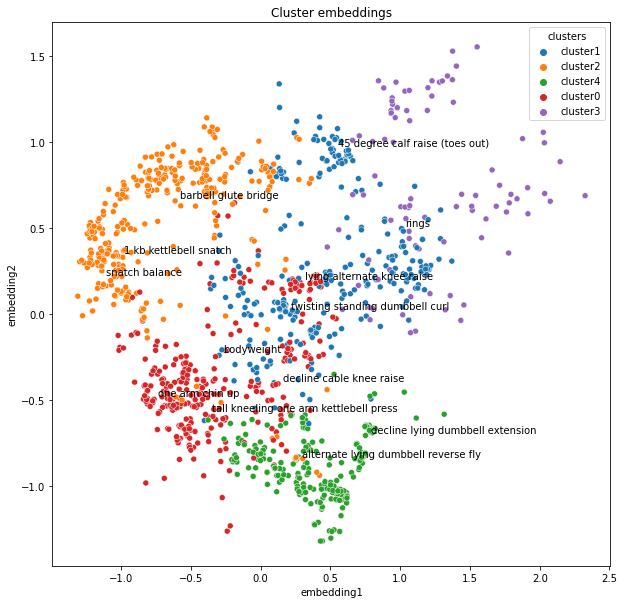

In [32]:
plt.figure(figsize=(10, 10))
plt.title("Cluster embeddings")
ax = sns.scatterplot(data=df, x="embedding1", y="embedding2", hue="clusters")

texts = []
for i, point in df.iterrows():
    if np.random.uniform() > 0.99:
        texts.append(plt.text(point['embedding1']+.02, point['embedding2'], str(point['exercises'])))
adjust_text(texts)